# $ \mbox{Asymptotic methods with SymPy}$

Projectile motion in a non-homogenous potential field with drag is described by the equation

$$y_{\tau \tau} + \alpha \epsilon y_{\tau} + \frac{1}{(1 + \epsilon y)^2} = 0,$$

with $y(0) = \epsilon$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing() 

In [2]:
y, eps, a, b, tau, t, alpha = sym.symbols('y, epsilon, a, b, tau, t, alpha')
y0 = sym.Function('y0')(t)
y1 = sym.Function('y1')(t)
y2 = sym.Function('y2')(t)
y3 = sym.Function('y3')(t)
y4 = sym.Function('y4')(t)

In [3]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2 + eps**3*y3 + eps**4*y4) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(t,t) + alpha*eps*y.lhs.diff(t)**2 + 1/(1 + eps*y.lhs)**2
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2
y

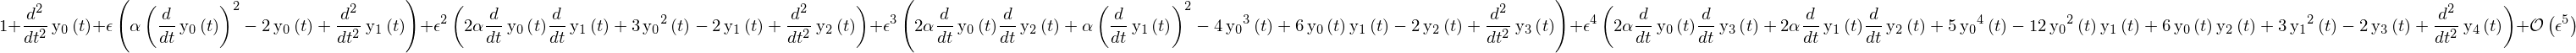

In [4]:
the_series = sym.series(f(y), eps, x0=0, n=5)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

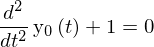

In [5]:
sym.Eq(by_order[1].removeO())

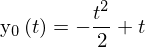

In [6]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(t,0) - 0, \
                      soln0.rhs.diff(t).subs(t,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

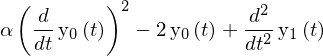

In [7]:
by_order[eps]

Note, this looks like an Autonomous equation.

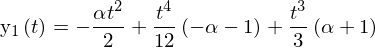

In [8]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(t,0) - 0, \
                      soln1.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

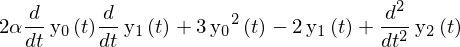

In [9]:
by_order[eps**2]

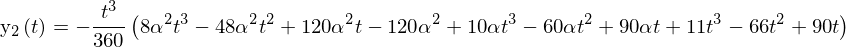

In [10]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(t,0) - 0, \
                      soln2.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

Non-linear term in the ODE, could linearize it, or add the numerical solution to the composite solution after lambda-ifying...

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

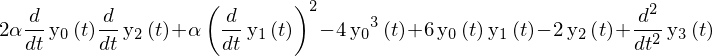

In [11]:
by_order[eps**3]

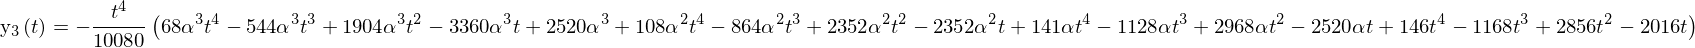

In [12]:
try:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs))
    
soln3 = sym.dsolve(eqn, y3)
constants = sym.solve([soln3.rhs.subs(t,0) - 0, \
                      soln3.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln3 = soln3.subs(constants)
sym.factor(soln3)

### $\mathcal{O} \left( \epsilon^4 \right) \mbox{Solution}$

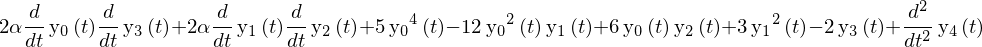

In [13]:
by_order[eps**4]

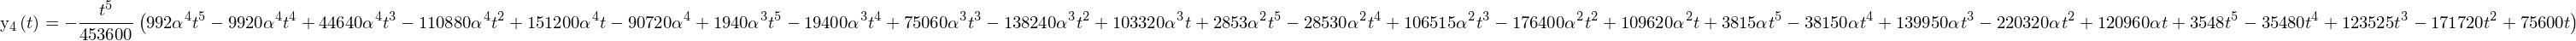

In [14]:
try:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs).replace(
        y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs))
    
soln4 = sym.dsolve(eqn, y4)
constants = sym.solve([soln4.rhs.subs(t,0) - 0, \
                      soln4.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln4 = soln4.subs(constants)
sym.factor(soln4)

### $\mbox{Composite Solution}$

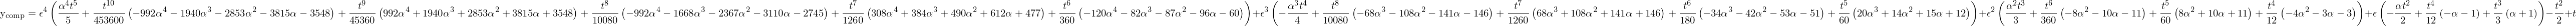

In [15]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
    
sym.latex(y_comp)
y_comp

### $\mbox{The Trajectory}$

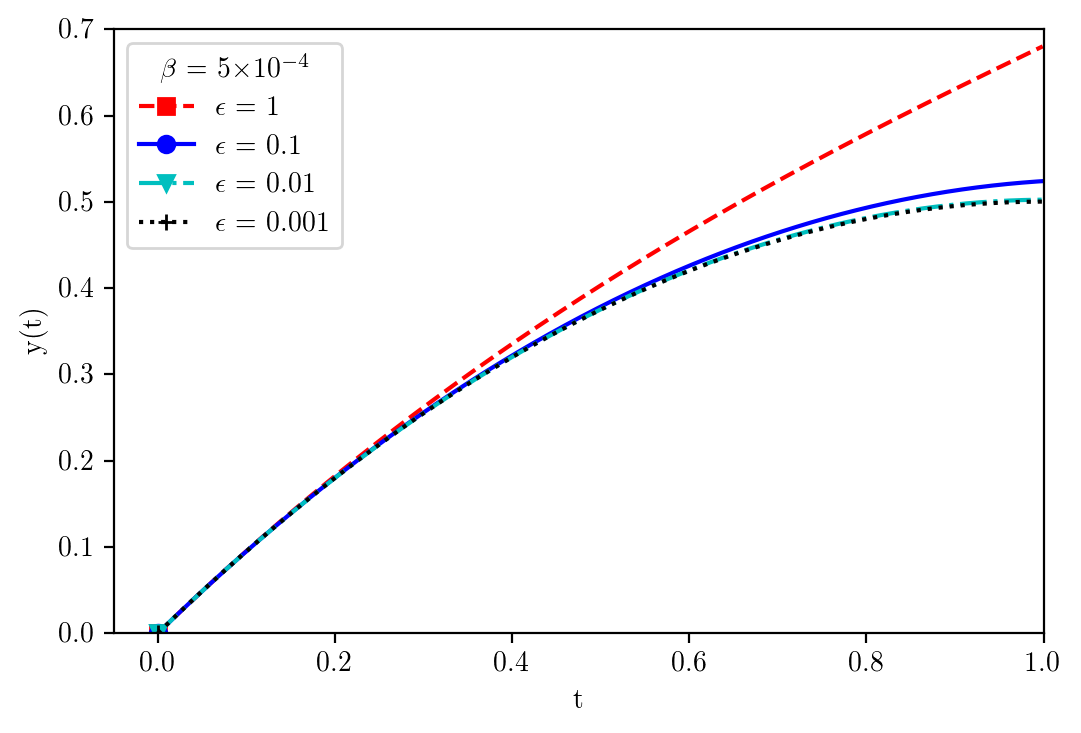

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

eps_val = [.001, .01, .1, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,1,0.001)
al = .5*1/1000
plt.figure(figsize=(6, 4), dpi=100)
for keys, vals in enumerate(eps_val):
    y_compP = sym.lambdify(t, y_comp.rhs.subs(eps, vals).subs(alpha, al), 'numpy')
    plt.plot(tt, y_compP(tt), linestyle[keys],label='$\epsilon$ = {}'.format(vals).rstrip('0').rstrip('.')
             , markevery=len(tt)/10)

plt.ylim(ymin=0., ymax=0.7)
plt.xlim(xmax=1)
plt.ylabel(r'y(t)')
plt.xlabel(r't')
plt.legend(title = r'  $\beta$ = {:1.0E}'.format(al)[:-4] + r'$\times 10^{-4}$')
plt.show()

## Time aloft

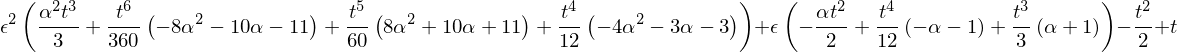

In [17]:
y2 = sym.symbols('y2', cls=sym.Function)
y2 = sym.Function('y2')(t)
try:
    y2 = sym.Eq(y2, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs) # + eps**2*soln2.rhs)
except NameError:
    y2 = sym.Eq(y2, eps*soln1.rhs + eps**2*soln2.rhs)
y2.rhs
#y2.diff(t)

In [18]:
tau0, tau1, tau2 = sym.symbols('tau0 tau1 tau2')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2)
y3 = y2.rhs.subs(t, tau.lhs).series(eps)
col = sym.collect(y3, eps, evaluate=False)

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

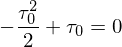

In [19]:
#tau0 = 2
sym.Eq(col[1].removeO())

Two roots, lets look at $\tau_0 = 2$.

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

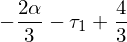

In [20]:
order_eps = col[eps].subs(tau0, 2)
order_eps 

In [21]:
soln_eps = sym.solve(order_eps, tau1)

### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

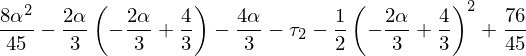

In [22]:
order_eps2 = col[eps**2].subs(tau0, 2).subs(tau1, soln_eps[0])
order_eps2

In [23]:
soln_eps2 = sym.solve(order_eps2, tau2)

### Composite solution

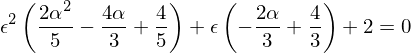

In [24]:
tau0, tau1, tau2 = sym.symbols('tau0 tau1 tau2')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2)
tau = tau.subs(tau0, 2).subs(tau1, soln_eps[0]).subs(tau2, soln_eps2[0])
tau
#tau

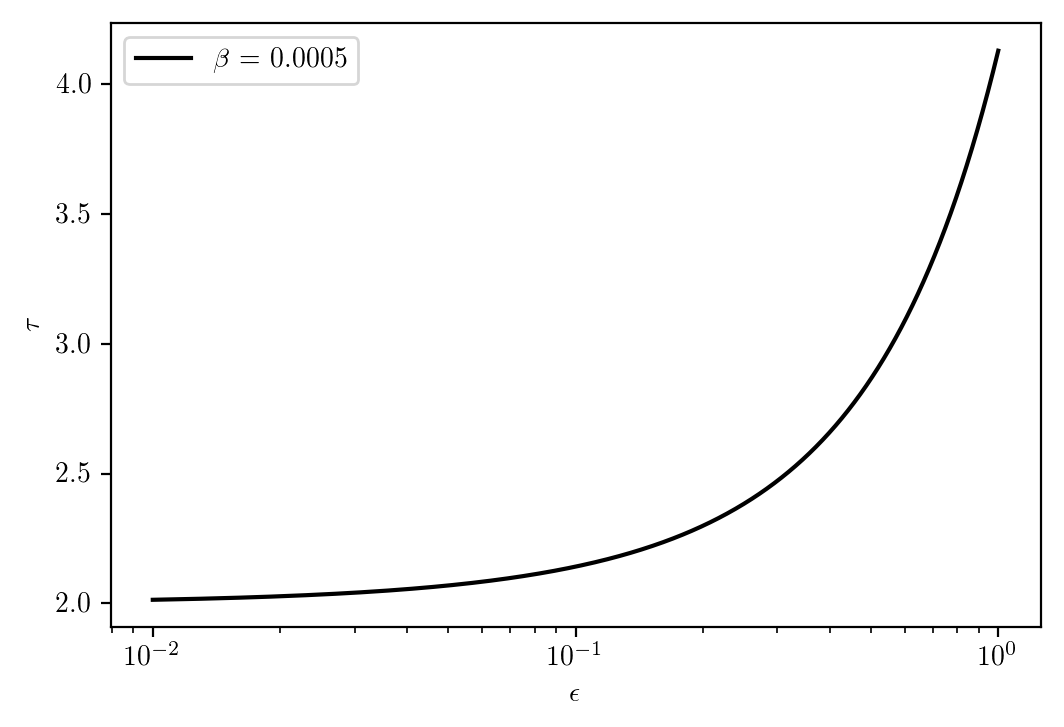

In [57]:
ttt = np.arange(0.01, 1.,0.001)
alphas = [al]
linestyle = ['k','rs--', 'bo-', 'cv-.', 'k+:', 'm']
plt.figure(figsize=(6, 4), dpi=100)
for keys, vals in enumerate(alphas):
    taun = tau.subs(alpha, vals)
    tau_soln = sym.lambdify(eps, taun.lhs, 'numpy')
    plt.semilogx(ttt, tau_soln(ttt), linestyle[keys], label=r'$\beta$ = {}'.format(vals), markevery=100)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\tau$')
plt.legend()
plt.show();

## Drag vs. inertia

In [26]:
t, V = sym.symbols('t V', real=True, positive=True)
u = sym.symbols('u', cls=sym.Function)
eq = sym.diff(u(t), t) + u(t)**2
sol = sym.dsolve(eq, u(t))
print(sol.rhs)
u = sol.rhs

1/(C1 + t)


In [27]:
C1, C2 = sym.symbols('C1 C2')
eq = sym.Eq(u.subs(t, 0), V)
sol = sym.solve(eq, C1)[0]
print(sol)
print(u.subs(C1, sol))

1/V
1/(t + 1/V)


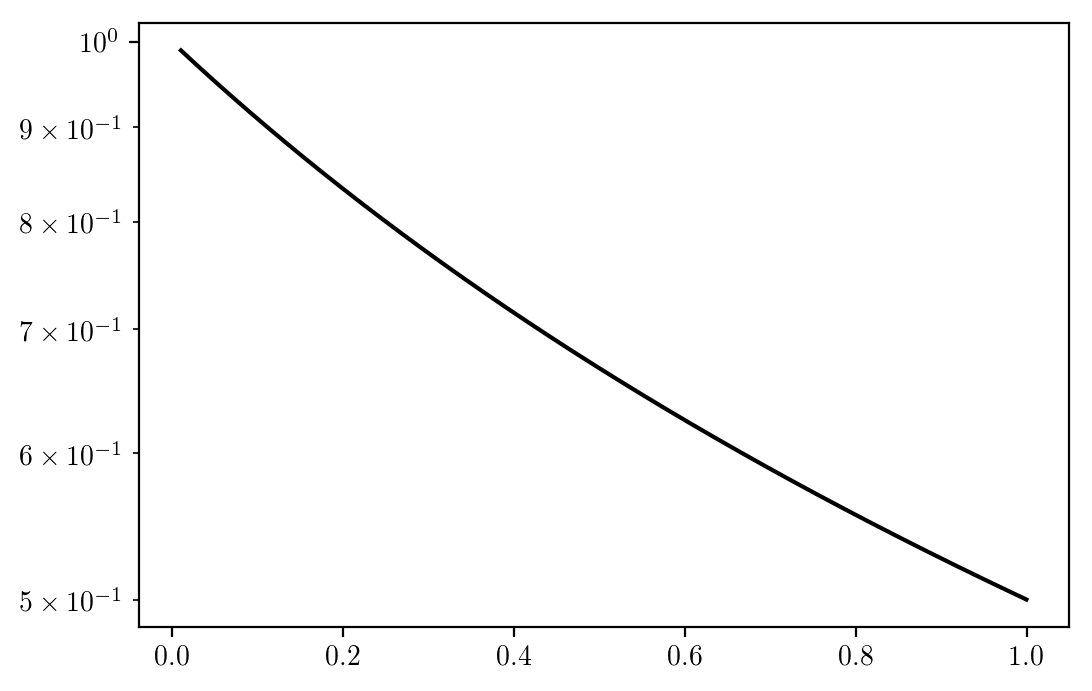

In [28]:
tt = np.arange(0.01,1.,0.001)
plt.figure(figsize=(6, 4), dpi=100)
u_soln = sym.lambdify(t, u.subs(C1, sol).subs(V,1.), 'numpy')
plt.semilogy(tt, u_soln(tt), 'k')
plt.show();